In [14]:
import tensorflow as tf
from keras.models import load_model
import numpy as np
import cv2
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import os

Enter your image path and the pixel_per_µm and run all cells to predict the SDAS!

In [15]:
dir_path = r'..\data\bmw_data' #soll für alle Bilder in dem Verzeichnis gemacht werden
img_name = r'AC_20_B1.jpg'
img_path = os.path.join(dir_path, img_name)
pixel_per_µm = 1/(0.728265817023213) #von Micha für Bildreihe ein von BMW (wurde in um/pixel angegeben, deswegen Kehrwert)

In [16]:
F = 1.36/pixel_per_µm
print(F) #höhere F führen zu besseren Vorraussagen laut Studie

0.9904415111515698


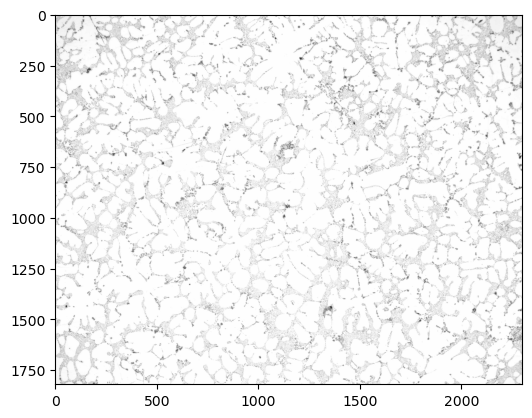

In [17]:
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')  # cmap='gray' für Graustufen-Darstellung
plt.show()

In [18]:
# Cut the main image in smaller pieces, so the model can perform inference. The outputs will be averaged.

height, width = img.shape

# Mindestgröße der Kacheln
min_size = 200

# Berechnung der Anzahl der Kacheln
rows = height // min_size
cols = width // min_size

# Schneiden und Speichern in einer Liste
images = []
for i in range(rows):
    for j in range(cols):
        y_start = i * min_size
        x_start = j * min_size
        y_end = min(y_start + min_size, height)
        x_end = min(x_start + min_size, width)
        
        image = img[y_start:y_end, x_start:x_end]
        images.append(image)

        

In [19]:
model = load_model(r'..\models\paper_model.keras', compile = False)

In [20]:
predictions = []
for image in images:
    resize = tf.image.resize(image[..., np.newaxis], (200,200))  # Kanal hinzufügen für TensorFlow-Kompatibilität
    predictions.append(model.predict(np.expand_dims(resize/200, 0)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━

In [21]:
S = np.mean(predictions)
print(S)

40.774715


In [22]:
SDAS = S * F
print(f"Der geschätzte SDAS des Bildes {img_name} beträgt {round(SDAS,2)}µm.")

Der geschätzte SDAS des Bildes AC_20_B1.jpg beträgt 40.38µm.


## Inferenz mit allen Bildern

In [25]:
import tensorflow as tf
from keras.models import load_model
import numpy as np
import cv2
import os

In [26]:
# Verzeichnis mit den Bildern
dir_path = r'..\data\bmw_data'
model_path = r'..\models\paper_model.keras'

In [27]:
# Laden des Modells
model = load_model(model_path, compile=False)

In [28]:
# Umrechnungsfaktor basierend auf Pixelgröße
pixel_per_µm = 1 / 0.728265817023213  # von Micha
F = 1.36 / pixel_per_µm

In [29]:
# Mindestgröße der Kacheln
min_size = 200

# Ergebnisse speichern
results = []

# Alle Bilder im Verzeichnis verarbeiten
for img_name in os.listdir(dir_path):
    if img_name.endswith('.jpg') or img_name.endswith('.png'):

        print(img_name)
        
        img_path = os.path.join(dir_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        height, width = img.shape
        
        # Berechnung der Anzahl der Kacheln
        rows = height // min_size
        cols = width // min_size
        
        # Bild in Kacheln aufteilen
        images = []
        for i in range(rows):
            for j in range(cols):
                y_start = i * min_size
                x_start = j * min_size
                y_end = min(y_start + min_size, height)
                x_end = min(x_start + min_size, width)
                image = img[y_start:y_end, x_start:x_end]
                images.append(image)
        
        # Modell-Vorhersagen sammeln
        predictions = []
        for image in images:
            resize = tf.image.resize(image[..., np.newaxis], (200, 200))
            predictions.append(model.predict(np.expand_dims(resize / 200, 0)))
        
        # Vorhersage berechnen
        S = np.median(predictions)
        SDAS_pred = S * F
        
        # Tatsächlichen SDAS-Wert aus Dateinamen extrahieren
        try:
            SDAS_trueb = float(img_name.split('_')[1])
            results.append((SDAS_true, SDAS_pred))
        except:
            print(f"Warnung: Konnte SDAS-Wert aus '{img_name}' nicht extrahieren.")

AC_39_B1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/ste

In [30]:
# Ergebnisse ausgeben
print("\nErgebnisse:")
print("True SDAS\tPred SDAS\tDifferenz (%)")
errors = []
for SDAS_true, SDAS_pred in results:
    diff = abs(SDAS_pred - SDAS_true) / SDAS_true * 100
    errors.append(diff)
    print(f"{SDAS_true:.2f} µm\t{SDAS_pred:.2f} µm\t{diff:.2f} %")


Ergebnisse:
True SDAS	Pred SDAS	Differenz (%)
39.00 µm	32.20 µm	17.43 %
39.00 µm	35.93 µm	7.86 %
39.00 µm	33.01 µm	15.37 %
39.00 µm	37.10 µm	4.86 %
39.00 µm	38.71 µm	0.75 %
39.00 µm	40.15 µm	2.96 %
39.00 µm	37.26 µm	4.45 %
39.00 µm	38.99 µm	0.02 %
39.00 µm	38.82 µm	0.46 %
39.00 µm	38.10 µm	2.30 %


In [31]:
# Gesamtmetrik: Mittlere absolute prozentuale Abweichung (MAPE)
MAPE = np.mean(errors)
print(f"\nMittlere absolute prozentuale Abweichung (MAPE): {MAPE:.2f} %")


Mittlere absolute prozentuale Abweichung (MAPE): 5.64 %
